# Ashmeet Kaur
# Task 3: - Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore and as a business manager, try to find out   the weak areas where you can work to make more profit.
# @The Sparks Foundation

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
os.chdir("C:/Users/DELL/Internship")

In [2]:
os.getcwd()

'C:\\Users\\DELL\\Internship'

In [3]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 13)

In [5]:
data.describe(include="all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


# Country and Postal Code don't provide any relevant information so drop them

In [7]:
data.drop(["Country","Postal Code"],axis=1,inplace=True)
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Correlation

In [8]:
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


# Correlation using heatmap

<AxesSubplot:>

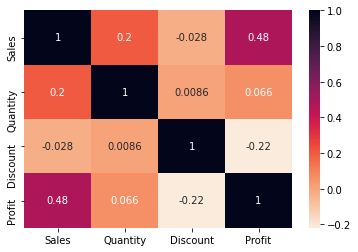

In [9]:
sns.heatmap(data.corr(),cmap='rocket_r',annot=True)

# Conclusion
1. Discount and profit are highly negatively correlated.
2. Sales and proft are moderately correlated.
3. Quantity and profit are very less correlated.

# Univariate Analysis for segment variable

In [10]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

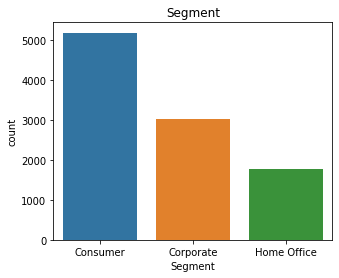

In [11]:
plt.figure(figsize=(5,4))
plt.title('Segment')
sns.countplot(x=data['Segment'])
plt.show()

# Conclusion
Maximum number of deals are made in the consumer segment

# Univariate analysis for Ship Mode variable

In [12]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

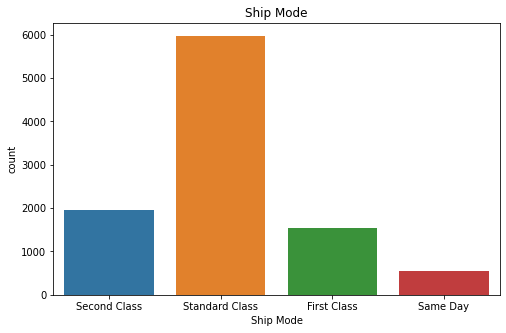

In [13]:
plt.figure(figsize=(8,5))
plt.title('Ship Mode')
sns.countplot(x=data['Ship Mode'])
plt.show()

# Conclusion
Standard class is the most preferable mode of shipping

# Univariate analysis for category variable

In [14]:
data["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

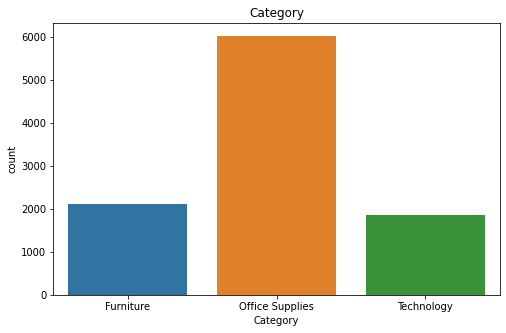

In [15]:
plt.figure(figsize=(8,5))
plt.title('Category')
sns.countplot(x=data['Category'])
plt.show()

# Conclusion
Maximum number of items that are being ordered is associated with office category

# Univariate analysis for Region variable

In [16]:
data["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

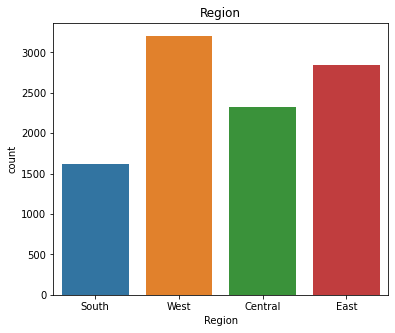

In [17]:
plt.figure(figsize=(6,5))
plt.title('Region')
sns.countplot(x=data['Region'])
plt.show()

# Conclusion
Maximum number of ordered placed are from West region

# Univariate analysis for Sub-category variable

In [18]:
data["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

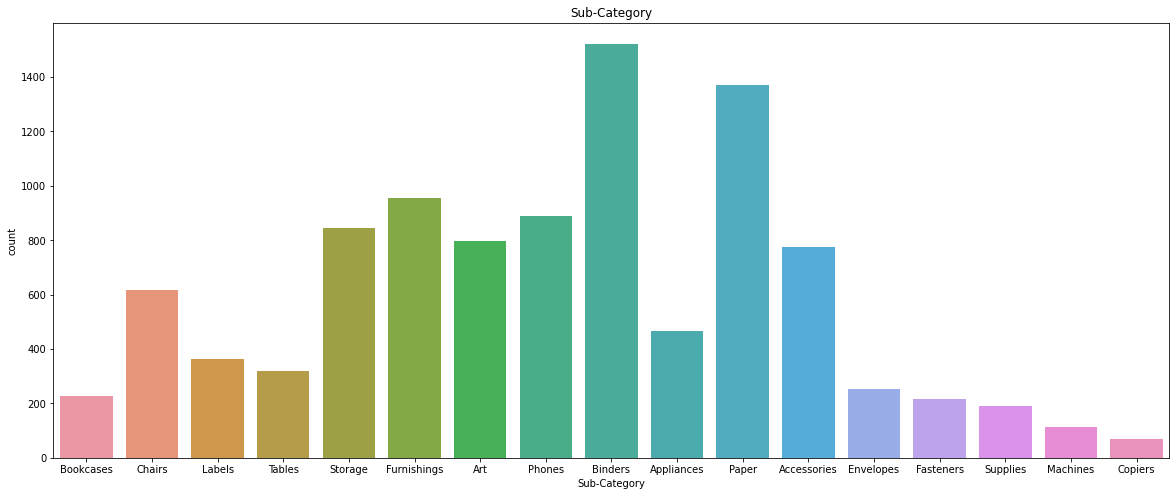

In [19]:
plt.figure(figsize=(20,8))
plt.title("Sub-Category")
sns.countplot(x=data["Sub-Category"])
plt.show()

# Conclusion
Highest number of deals belongs to Binders sub-category.

# Univariate analysis for Quantity variable

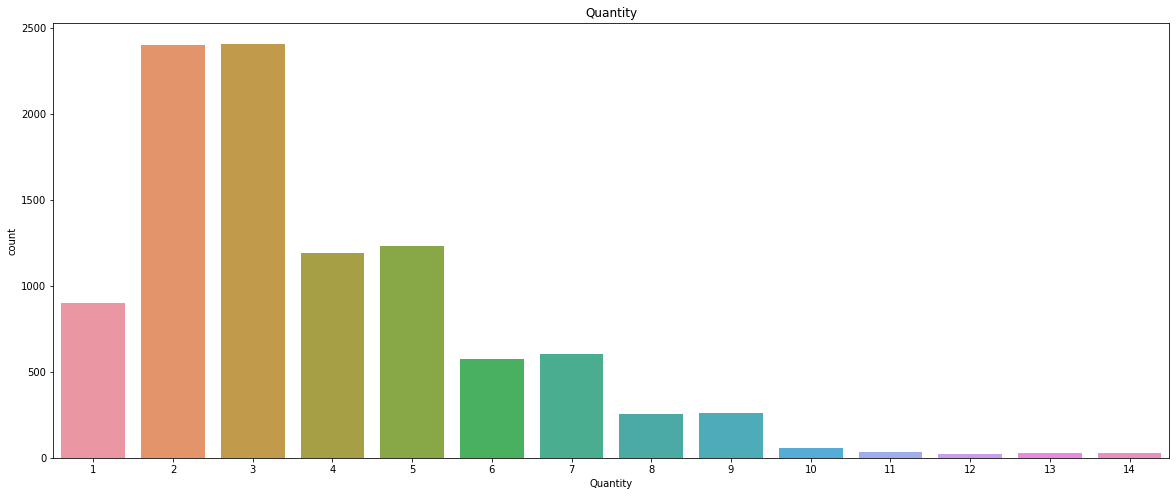

In [20]:
plt.figure(figsize=(20,8))
plt.title("Quantity")
sns.countplot(x=data["Quantity"])
plt.show()

# Conclusion
More number of deals are ordered with 2 or 3 different products.

# Multivariate Analysis

# Analysis of Sales with respect to state

In [21]:
df1 = data['State'].value_counts()
df1.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

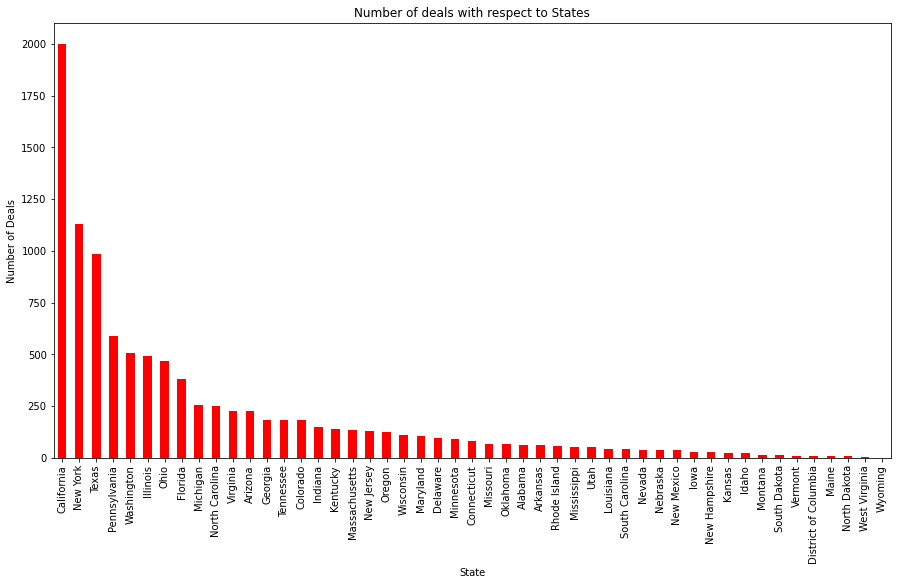

In [22]:
df1.plot(kind='bar',color='r',figsize=(15,8))
plt.xlabel("State")
plt.ylabel("Number of Deals")
plt.title("Number of deals with respect to States")
plt.show()

# Conclusion
1. State with highest Sale: -California
2. State with least number of sales: - Wyoming

# Analysis of Sale with respect to City

In [23]:
df1=data["City"].value_counts()
df2=df1.head(20)

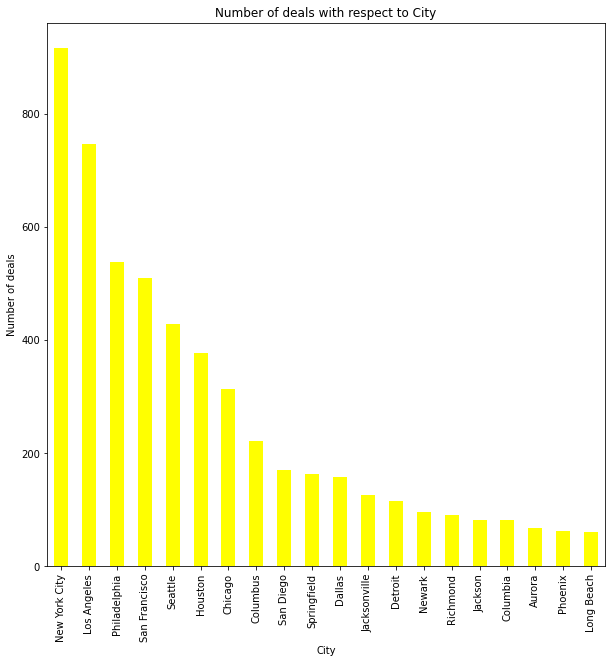

In [24]:
df2.plot(kind='bar',color="yellow",figsize=(10,10))
plt.xlabel("City")
plt.ylabel("Number of deals")
plt.title("Number of deals with respect to City")
plt.show()

# Conclusion
1. Highest number of deals are made in New York City

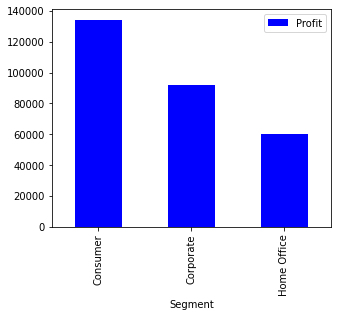

In [25]:
p = data.groupby(by ='Segment')[['Profit']].sum()
p.plot(kind = 'bar',figsize =(5,4),color='b')
plt.show()

# Conclusion
Most of the profit comes from consumer sector as above also we have seen that the maximum number of orders placed belongs to the consumer segment. In order to increase the profit we need to focus in 
home office segment.

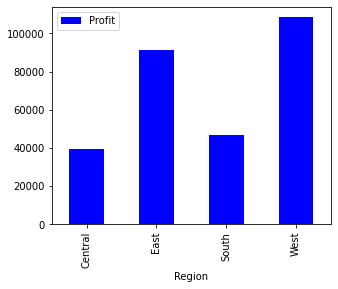

In [26]:
p = data.groupby(by ='Region')[['Profit']].sum()
p.plot(kind = 'bar',figsize =(5,4),color='b')
plt.show()

# Conclusion
West region has maximum profit whereas central has the lowest one. So, it is required to pay more focus in central and south region

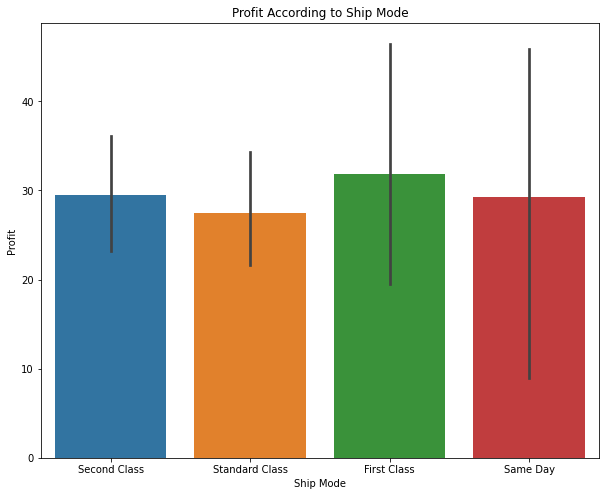

In [27]:
plt.figure(figsize=(10,8))
plt.title('Profit According to Ship Mode')
sns.barplot(x ='Ship Mode', y= 'Profit', data = data)
plt.show()

# Conclusion
Maximum profit is for first class Ship Mode

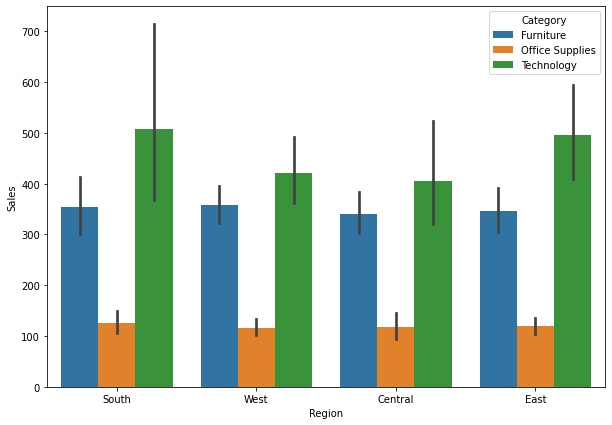

In [29]:
plt.figure(figsize=(10, 7))
sns.barplot(x="Region", y="Sales", hue="Category", data=data)
plt.show()

# Conclusion
In all the regions the highest number of sales belongs to technology

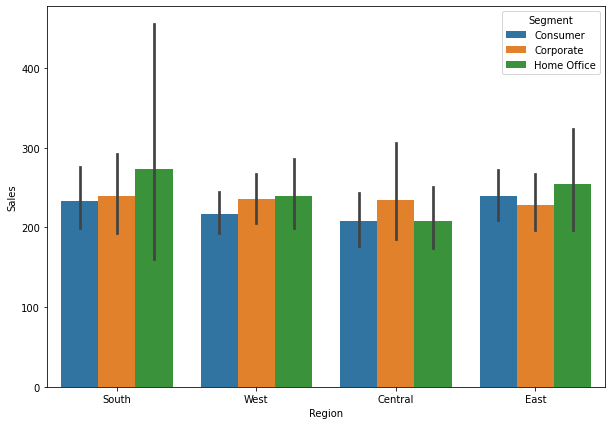

In [30]:
plt.figure(figsize=(10, 7))
sns.barplot(x="Region", y="Sales", hue="Segment", data=data)
plt.show()

# Conclusion
From the above graph it is clear that for south region, maximum number of sales come from home-office segment. Sales in Corporate segment is almost same for all the four regions but it is maximum fr Central region. Sales in Consumer segment is also almost same for all the regions.

# Discount v/s Profit

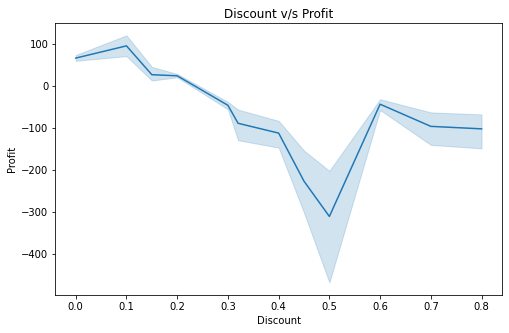

In [31]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Discount",y="Profit",data=data)
plt.title("Discount v/s Profit")
plt.show()

# Final Obseravtion
1. Discount and Profit are highly negatively coorelated.
2. Need to focus in Corporate and Home Office segments.
3. Need to make amendments in Same Day Shipping Mode to increse the profit.
4. Need to focus more in Central and South region.
5. Here the most preferable mode of shipping is Standard class but profit made from it is least. So, some work should also be done in this field.
6. To increase the profit, we need to focus on Wyoming city which is showing negligible profit.
7. Number of deals are highest for Office Supplies, but profit drawn from them is least. Some work should also be done in this area to increase the profit.